In [176]:
import sys
import os
sys.path.append('/home/tpopova/prj/polymer_brush')

from py_utils.pore_utils import pore_final
from py_utils.pore_gen_in import generate_pore_in_files


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from math import sqrt
from math import exp
from math import pi

import plotly.graph_objects as go

Параметры

In [177]:
N = 300
S = 150
D = 110
alpha = 0.5

Cs_range = np.linspace(0.01, 0.0001, num = 30)
r_range = np.linspace(0, D, num = D)

Доп функции

In [178]:
# def find_element(polymer_dens, value, coordinate):
#     index = np.where(polymer_dens < value)[0][0]
#     corresponding_element = coordinate[index]
#     return corresponding_element

In [179]:
def find_min_value(arr1, arr2):
    min_index = 0
    min_difference = float('inf')
    
    for i in range(len(arr1) - 1):
        difference = abs(arr1[i] - arr1[i+1])
        if difference < min_difference:
            min_difference = difference
            min_index = i + 1
    
    corresponding_value = arr2[min_index]
    
    return min_index, corresponding_value

In [180]:
H_SCF, H_theory = [], []
for cs in Cs_range:
    file_name_pro = generate_pore_in_files(template_pore = '/home/tpopova/prj/polymer_brush/_pore/pore_template.in',
                    
                    #название параметра
                    range_param = 'Cs',

                    N_brush = N,
                    S = S,
                    Cs = cs,
                    alpha = alpha,
                    D = D,
                    min_range_value = min(Cs_range),
                    max_range_value = max(Cs_range))
    
    #AT
    H, r_in_range, r_out_range, psi_in_range, psi_out_range, c_pol, rho, theta = pore_final(S = S,
                alpha  = alpha,
                Cs  = cs,
                lb  = 1,
                D  = D,
                N = N)

    polymer_density_SCF = np.asarray(pd.read_csv(file_name_pro, sep='\t')['mol_pol_phi'])
    
    index, value = find_min_value(polymer_density_SCF, r_range)

    H_SCF.append(value)
    H_theory.append(H)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.516496e+00 |g| = 7.210962e+00 alpha = 1.000000e+00 
hessian scaling: 2.64681
it =  1  E = 2.211950e+00 |g| = 6.128356e+00 alpha = 1.138678e-01 
it =  2  E = 1.751878e+00 |g| = 6.165640e+00 alpha = 1.721074e-01 
it =  3  E = 5.431164e+00 |g| = 5.753661e+00 alpha = 1.545153e-02 
it =  4  E = 2.489218e+00 |g| = 5.761040e+00 alpha = 6.875576e-02 
it =  5  E = 1.098531e+01 |g| = 5.455326e+00 alpha = 3.122038e-03 
it =  6  E = 2.358284e+00 |g| = 5.506742e+00 alpha = 6.436824e-02 
it =  7  E = 6.445674e+00 |g| = 5.757339e+00 alpha = 9.593331e-03 
it =  8  E = 2.971506e+00 |g| = 5.806368e+00 alpha = 4.288653e-02 
it =  9  E = 9.625557e+00 |g| = 5.959640e+00 alpha = 4.461050e-03 
it =  10  E = 4.196063e+00 |g| = 5.936064e+00

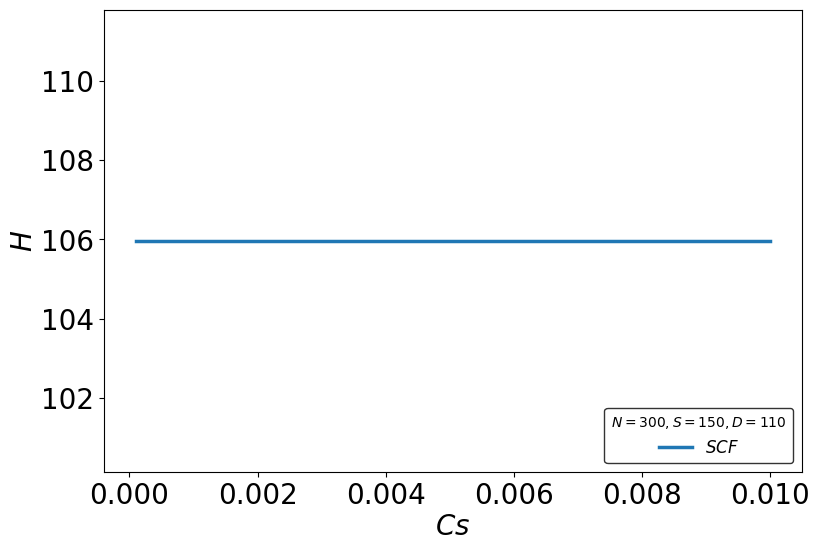

In [182]:
fig, axs1 = plt.subplots(nrows = 1, ncols = 1)
    
# axs1.plot(Cs_range, H_theory, linestyle = '-',
#     linewidth = 2.5,  label = f'$AT$')

axs1.plot(Cs_range, H_SCF, linestyle = '-',
    linewidth = 2.5,  label = f'$SCF$')


axs1.set_ylabel("$H$",
        fontsize = 20,
        color = 'black', 
        labelpad = 2.5)

axs1.set_xlabel("$Cs$",
        fontsize = 20,
        color = 'black', 
        labelpad = 2.5)

axs1.legend(title = f'$N = {N} , S = {S}, D = {D}$',
    fontsize = 12, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '10', 
        loc = 'lower right')

fig.set_figwidth(9)
fig.set_figheight(6)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20